In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nba_2020_per_game.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  651 non-null    object 
 1   Pos     651 non-null    object 
 2   Age     651 non-null    int64  
 3   Tm      651 non-null    object 
 4   G       651 non-null    int64  
 5   GS      651 non-null    int64  
 6   MP      651 non-null    float64
 7   FG      651 non-null    float64
 8   FGA     651 non-null    float64
 9   FG%     649 non-null    float64
 10  3P      651 non-null    float64
 11  3PA     651 non-null    float64
 12  3P%     616 non-null    float64
 13  2P      651 non-null    float64
 14  2PA     651 non-null    float64
 15  2P%     645 non-null    float64
 16  eFG%    649 non-null    float64
 17  FT      651 non-null    float64
 18  FTA     651 non-null    float64
 19  FT%     618 non-null    float64
 20  ORB     651 non-null    float64
 21  DRB     651 non-null    float64
 22  TR

In [4]:
data = data.drop('G', axis=1)
data = data.drop('FGA', axis=1)
data = data.drop('ORB', axis=1)
data = data.drop('DRB', axis=1)
data = data.drop('3PA', axis=1)
data = data.drop('2PA', axis=1)
data = data.drop('2P%', axis=1)
data = data.drop('2P', axis=1)
data = data.drop('FTA', axis=1)
data = data.drop('eFG%', axis=1)
data = data.drop('PF', axis=1)


In [5]:
data.isna().sum()

Player     0
Pos        0
Age        0
Tm         0
GS         0
MP         0
FG         0
FG%        2
3P         0
3P%       35
FT         0
FT%       33
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PTS        0
dtype: int64

In [6]:
data = data.fillna(0.000)

In [7]:
data.isna().sum()

Player    0
Pos       0
Age       0
Tm        0
GS        0
MP        0
FG        0
FG%       0
3P        0
3P%       0
FT        0
FT%       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PTS       0
dtype: int64

In [8]:
data.to_csv("data_cleaned.csv")

In [9]:
data = pd.read_csv("data_cleaned.csv")
data.describe()

,Unnamed: 0,Age,GS,MP,FG,FG%,3P,3P%,FT,FT%,TRB,AST,STL,BLK,TOV,PTS
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,325.000000,25.763441,17.537634,19.179724,3.097849,0.441530,0.938863,0.296587,1.337788,0.706066,3.563287,1.843932,0.617665,0.398157,1.101075,8.461290
std,188.071795,4.024840,23.022124,9.060972,2.222285,0.114024,0.849802,0.147897,1.338949,0.219550,2.429509,1.698073,0.406082,0.409010,0.807703,6.197278
min,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162.500000,23.000000,0.000000,12.000000,1.400000,0.398500,0.300000,0.250000,0.500000,0.646500,1.900000,0.700000,0.300000,0.100000,0.600000,3.800000
50%,325.000000,25.000000,4.000000,18.500000,2.500000,0.439000,0.800000,0.333000,0.900000,0.762000,3.100000,1.300000,0.600000,0.300000,0.900000,6.800000
75%,487.500000,28.000000,29.500000,26.700000,4.300000,0.486000,1.400000,0.376000,1.700000,0.833000,4.650000,2.200000,0.900000,0.500000,1.400000,11.650000
max,650.000000,43.000000,73.000000,37.500000,10.900000,1.000000,4.400000,1.000000,10.200000,1.000000,15.800000,10.200000,2.100000,2.900000,4.800000,34.300000


In [10]:

print(len(data['Player'].unique()))
print(len(data['Pos'].unique()))
print(len(data['Tm'].unique()))

529
9
31


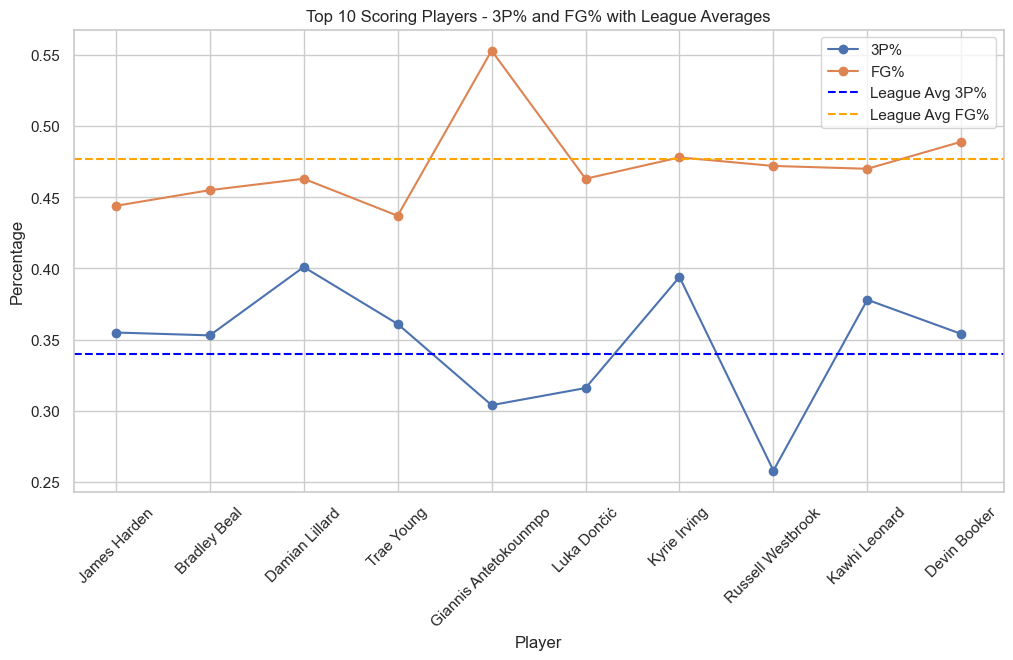

In [20]:
# Calculate league averages for 3P% and FG%
league_avg_3P = data['3P%'].mean()
league_avg_FG = data['FG%'].mean()

# Sort the data by the 'PTS' column in descending order
sorted_data = data.sort_values(by='PTS', ascending=False)

# Get the top 10 scoring players
top_10_scorers = sorted_data.head(10)

# Set the style for the plot
sns.set(style="whitegrid")

# Create two line charts with 'Player' on the x-axis, and '3P%' and 'FG%' on the y-axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(top_10_scorers['Player'], top_10_scorers['3P%'], label='3P%', marker='o')
ax.plot(top_10_scorers['Player'], top_10_scorers['FG%'], label='FG%', marker='o')

# Add horizontal lines representing league averages
ax.axhline(league_avg_3P, color='blue', linestyle='--', label='League Avg 3P%')
ax.axhline(league_avg_FG, color='orange', linestyle='--', label='League Avg FG%')

# Set the labels and title for the plot
ax.set_xlabel('Player')
ax.set_ylabel('Percentage')
ax.set_title('Top 10 Scoring Players - 3P% and FG% with League Averages')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.show()


In [19]:
# Filter the data to include only the five basic positions
basic_positions = ['PG', 'SG', 'SF', 'PF', 'C']
data = data[data['Pos'].isin(basic_positions)]

# Create a custom discrete color scale for positions
position_colors = {'PG': 'red', 'SG': 'blue', 'SF': 'green', 'PF': 'orange', 'C': 'purple'}

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(data,
                 x='PTS',
                 y='AST',
                 color='Pos',
                 color_discrete_map=position_colors,
                 hover_name='Player',
                 hover_data=['Tm', 'Age'],
                 title='NBA Players - Assists (AST) vs. Points (PTS)',
                 labels={'AST': 'Assists', 'PTS': 'Points', 'Pos': 'Position'})

# Customize the color scale
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Calculate the overall trendline
x = data['PTS']
y = data['AST']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Add the overall trendline to the plot
fig.add_shape(type='line',
              x0=min(x), x1=max(x),
              y0=slope * min(x) + intercept, y1=slope * max(x) + intercept,
              yref='y', xref='x',
              line=dict(color='gray', dash='dot'))

# Display the interactive plot
fig.show()

In [18]:
# Filter the data to include only the five basic positions
basic_positions = ['PG', 'SG', 'SF', 'PF', 'C']
data = data[data['Pos'].isin(basic_positions)]

# If one player has many teams, choose the highest point team
data = data.loc[data.groupby('Player')['PTS'].idxmax()]

# Sort the data by points scored and group them by position
top_10_by_position = []
for position in basic_positions:
    top_10 = data[data['Pos'] == position].nlargest(10, 'PTS')
    top_10_by_position.append(top_10)

data = pd.concat(top_10_by_position)

# Reorder the data by position and points for better animation
data['Pos'] = pd.Categorical(data['Pos'], categories=basic_positions, ordered=True)
data = data.sort_values(['Pos', 'PTS'], ascending=[True, True])

# Create an animated bar chart using Plotly Express
fig = px.bar(data,
             x='PTS',
             y='Player',
             color='Pos',
             color_discrete_map=position_colors,
             animation_frame='Pos',
             orientation='h',
             hover_name='Player',
             hover_data=['Tm', 'Age'],
             title='Top 10 NBA Players by Points per Position',
             labels={'Player': 'Player Name', 'PTS': 'Points', 'Pos': 'Position'},
             range_x=[0, data['PTS'].max() * 1.1])

# Display the interactive plot
fig.show()


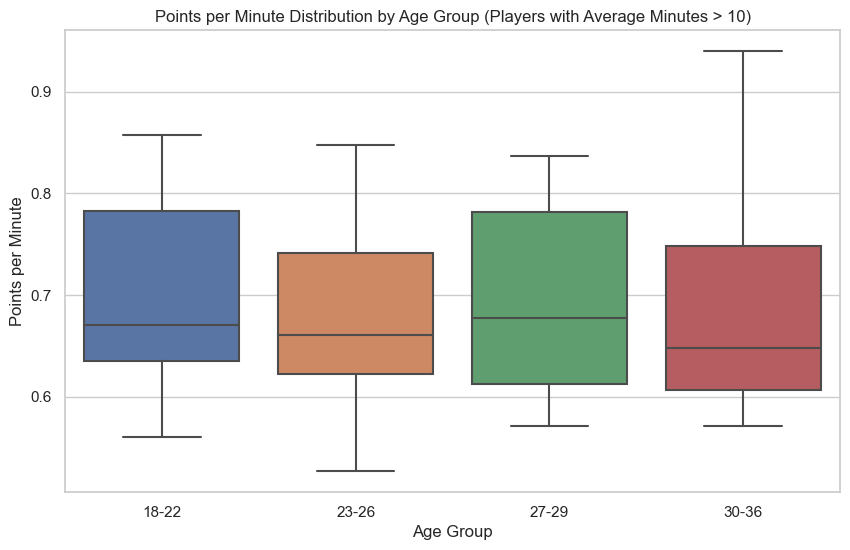

In [17]:
# Filter data for players with an average of more than 10 minutes per game
data = data[data["MP"] > 10]

# Calculate points per minute
data["PPM"] = data["PTS"] / data["MP"]

# Group ages into bins
age_bins = [18, 22, 26, 29, 36]
age_labels = ["18-22", "23-26", "27-29", "30-36"]
data["Age_Group"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

# Create a box plot to show the distribution of PPM for each age group without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age_Group", y="PPM", data=data, showfliers=False)
plt.title("Points per Minute Distribution by Age Group (Players with Average Minutes > 10)")
plt.xlabel("Age Group")
plt.ylabel("Points per Minute")
plt.show()
